In [ ]:
pip install rasterio

In [5]:
import numpy as np
import rasterio

# Function to calculate volume change
def calculate_volume_change(dem1_path, dem2_path, mask1_path, mask2_path):
    # Open DEM and mask files using rasterio
    with rasterio.open(dem1_path) as dem1_ds, rasterio.open(dem2_path) as dem2_ds, \
         rasterio.open(mask1_path) as mask1_ds, rasterio.open(mask2_path) as mask2_ds:
        
        # Read data and affine transformation matrices
        dem1 = dem1_ds.read(1)
        dem2 = dem2_ds.read(1)
        mask1 = mask1_ds.read(1)
        mask2 = mask2_ds.read(1)
        
        # Calculate pixel area (assuming square pixels)
        pixel_area = abs(dem1_ds.transform.a * dem1_ds.transform.e)
        
        # Calculate volume change within the glacier mask
        volume_change = np.sum(mask1 * pixel_area * (dem2 - dem1))
        
    return volume_change

# Paths to your DEM and mask files in ASC format
dem1_path = 'Assignment DATA-20231004/data_part1/dem_fiescher_1980.asc'
dem2_path = "Assignment DATA-20231004/data_part1/dem_fiescher_2009.asc"
mask1_path = "Assignment DATA-20231004/data_part1/glacier_mask_fiescher_1980.asc"
mask2_path = "Assignment DATA-20231004/data_part1/glacier_mask_fiescher_2009.asc"

# Calculate volume change
volume_change = calculate_volume_change(dem1_path, dem2_path, mask1_path, mask2_path)

print(f"Volume Change: {volume_change} cubic meters")
print(f"Total Mass Change: {volume_change/0.85} tonnes")


Volume Change: -758622626.6479492 cubic meters
Mass Change: -892497207.8211168 tonnes


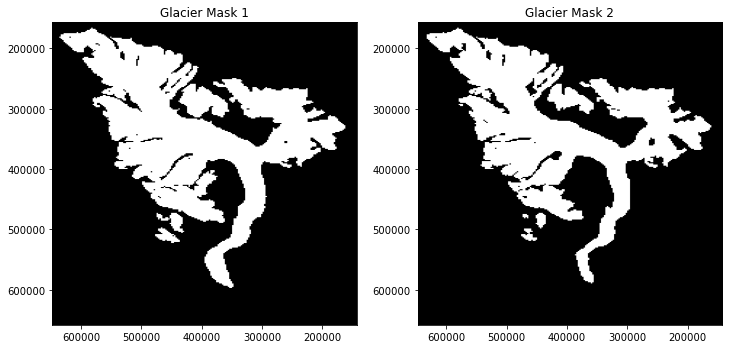

Volume Change: -758622626.6479492 cubic meters


In [6]:
import numpy as np
import rasterio
import os
import matplotlib.pyplot as plt

# Function to calculate volume change and visualize the masks
def calculate_volume_change_and_visualize(dem1_path, dem2_path, mask1_path, mask2_path):
    # Open DEM and mask files using rasterio
    with rasterio.open(dem1_path) as dem1_ds, rasterio.open(dem2_path) as dem2_ds, \
         rasterio.open(mask1_path) as mask1_ds, rasterio.open(mask2_path) as mask2_ds:
        
        # Read data and affine transformation matrices
        dem1 = dem1_ds.read(1)
        dem2 = dem2_ds.read(1)
        mask1 = mask1_ds.read(1)
        mask2 = mask2_ds.read(1)
        
        # Calculate pixel area (assuming square pixels)
        pixel_area = abs(dem1_ds.transform.a * dem1_ds.transform.e)
        
        # Calculate volume change within the glacier mask
        volume_change = np.sum(mask1 * pixel_area * (dem2 - dem1))
        
        # Visualize the glacier masks
        fig, axs = plt.subplots(1, 2, figsize=(12, 6))
        axs[0].imshow(mask1, cmap='gray', extent=dem1_ds.bounds, origin='upper')
        axs[0].set_title('Glacier Mask 1')
        axs[1].imshow(mask2, cmap='gray', extent=dem2_ds.bounds, origin='upper')
        axs[1].set_title('Glacier Mask 2')
        plt.show()
        
    return volume_change

# Paths to your DEM and mask files in ASC format
dem1_path = 'Assignment DATA-20231004/data_part1/dem_fiescher_1980.asc'
dem2_path = "Assignment DATA-20231004/data_part1/dem_fiescher_2009.asc"
mask1_path = "Assignment DATA-20231004/data_part1/glacier_mask_fiescher_1980.asc"
mask2_path = "Assignment DATA-20231004/data_part1/glacier_mask_fiescher_2009.asc"

# Calculate volume change and visualize masks
volume_change = calculate_volume_change_and_visualize(dem1_path, dem2_path, mask1_path, mask2_path)

print(f"Volume Change: {volume_change} cubic meters")

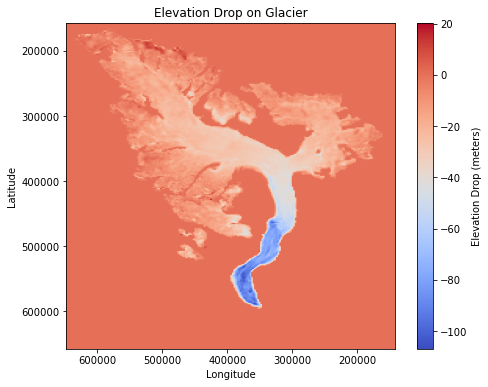

In [7]:
import numpy as np
import rasterio
import os
import matplotlib.pyplot as plt

# Function to calculate elevation drop and create a heatmap
def calculate_elevation_drop_and_create_heatmap(dem1_path, dem2_path, mask1_path, mask2_path):
    # Open DEM and mask files using rasterio
    with rasterio.open(dem1_path) as dem1_ds, rasterio.open(dem2_path) as dem2_ds, \
         rasterio.open(mask1_path) as mask1_ds, rasterio.open(mask2_path) as mask2_ds:
        
        # Read data and affine transformation matrices
        dem1 = dem1_ds.read(1)
        dem2 = dem2_ds.read(1)
        mask1 = mask1_ds.read(1)
        mask2 = mask2_ds.read(1)
        
        # Calculate elevation drop within the glacier mask
        elevation_drop = (mask1 * (dem2 - dem1))  # Elevations reduced to meters
        
        # Create a heatmap of elevation drop
        plt.figure(figsize=(8, 6))
        plt.imshow(elevation_drop, cmap='coolwarm', extent=dem1_ds.bounds, origin='upper')
        plt.colorbar(label='Elevation Drop (meters)')
        plt.title('Elevation Drop on Glacier')
        plt.xlabel('Longitude')
        plt.ylabel('Latitude')
        plt.show()

# Paths to your DEM and mask files in ASC format
dem1_path = 'Assignment DATA-20231004/data_part1/dem_fiescher_1980.asc'
dem2_path = "Assignment DATA-20231004/data_part1/dem_fiescher_2009.asc"
mask1_path = "Assignment DATA-20231004/data_part1/glacier_mask_fiescher_1980.asc"
mask2_path = "Assignment DATA-20231004/data_part1/glacier_mask_fiescher_2009.asc"

# Calculate elevation drop and create a heatmap
calculate_elevation_drop_and_create_heatmap(dem1_path, dem2_path, mask1_path, mask2_path)
